# <span style="color:darkblue"> Lecture 23 - Practicing Time and Plots  </span>

<font size = "5">

In  this lecture we will practice working with time in Python

- There will be a quiz on this lecture


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime

# <span style="color:darkblue"> I. Review of time commands </span>

<font size = "5">

Line plot: $\qquad \qquad \qquad \quad \ $ ``` plt.plot() ```

Parse string column to date: $\ $``` pd.to_datetime(data_column,format)```

Date to string:  $\qquad \qquad \quad \ $ ```.dt.strftime(format)```

Group by time period:
$\qquad \ \ $ ``` pd.Grouper(key='date', freq='m')```

Include group as column: $\quad$ ```.reset_index()```

Difference between periods: $\ $``` .diff() ```

Lag a periods: $\qquad \qquad \quad \ $ ``` .shift(1) ```

Between two periods (bool): $\ $ ```.between("date1","date2")```

Convert wide to long: $\qquad \quad $ ``` pd.melt(...) ```

Convert long to wide: $\qquad \quad $ ``` pd.pivot(...) ```

## <span style="color:darkblue"> II. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)

The quiz will use a time series dataset



<font size = "5">

(a) Import a dataset, parse date column using wildcards <br>
$\quad$ (see Lecture 21), and sort dataset

(b) Line plots from multiple columns with a legend

(c) Compute growth rates for a time series

(d) Flag a subset of the data and produce a shaded plot <br>
$\quad$ as in Lecture 22

(e) Compute aggregate dataset by time period

(f) Convert a dataset to long format


<font size = "5">

(a) Import a dataset, parse date column using wildcards <br>
$\quad$ (see Lecture 21), and sort dataset

In [3]:
financial = pd.read_csv("data_raw/financial.csv") 
financial["date"] = pd.to_datetime(financial["date_str"])

<font size = "5">

(b) Line plots from multiple columns with a legend

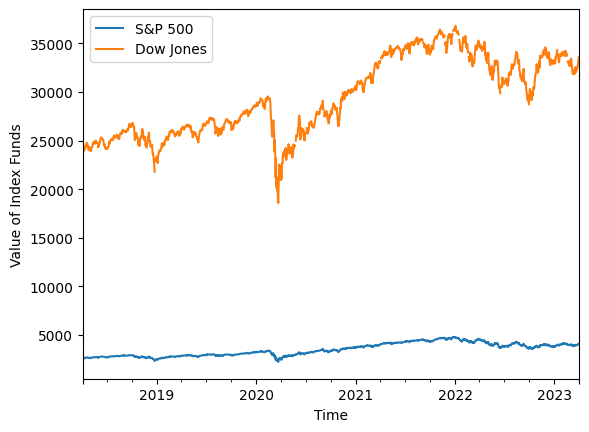

In [4]:

financial[["date","sp500","djia"]].set_index("date").plot() #many cols
plt.xlabel("Time")
plt.ylabel("Value of Index Funds")
plt.legend(["S&P 500","Dow Jones"])

<font size = "5">
(c) Compute growth rates for a time series


,djia,diff_djia,lag_djia,growth_djia
0,24264.30,NaN,NaN,NaN
1,24505.22,240.92,24264.30,0.992899
2,23932.76,-572.46,24505.22,-2.336074
3,23979.10,46.34,23932.76,0.193626
4,24408.00,428.90,23979.10,1.788641
...,...,...,...,...
1300,32717.60,323.35,32394.25,0.998171
1301,32859.03,141.43,32717.60,0.432275
1302,33274.15,415.12,32859.03,1.263336
1303,33601.15,327.00,33274.15,0.982745


Text(0.5, 1.0, 'Growth in the Dow Jones Index')

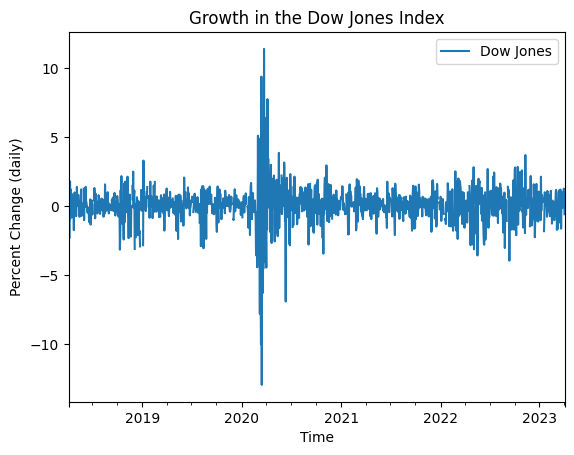

In [8]:
financial["diff_djia"] = financial["djia"].diff()
financial["lag_djia"]    = financial["djia"].shift(1)
financial["growth_djia"] = financial["diff_djia"]* 100/financial["lag_djia"]

display(financial[["djia","diff_djia", "lag_djia", "growth_djia"]]) 

#graphing
financial[["date","growth_djia"]].set_index("date").plot() #concise syntax allowing for multiple plots
plt.xlabel("Time")
plt.ylabel("Percent Change (daily)")
plt.legend(["Dow Jones"])
plt.title("Growth in the Dow Jones Index")


<font size = "5">

(d) Flag a subset of the data and produce a shaded plot <br>
$\quad$ as in Lecture 22

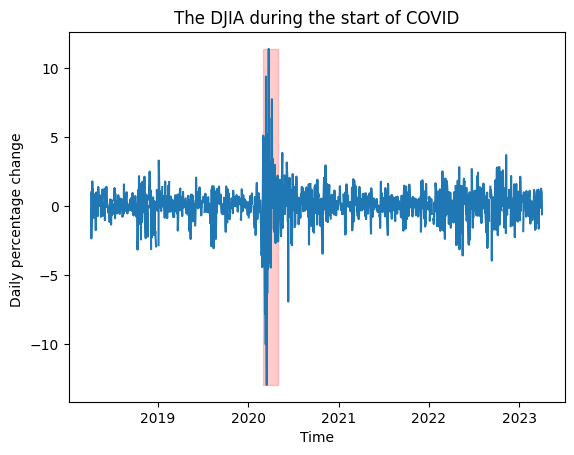

In [10]:
financial["bool_period"]  = financial["date"].between("2020-03-01","2020-05-01")
financial["bool_example"] = financial["growth_djia"] > 5

# Create a line plot
plt.plot("date", "growth_djia", data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("The DJIA during the start of COVID")

# Add a shaded region wth a rectangle
# "x" is the x-coordinates, "y1" and "y2" are the lower
# and upper bounds of the rectangle. We can set this
# to be the minimum and meximum of the outcome.
# we use "where" to test a logical condition

vec_y = financial["growth_djia"]
plt.fill_between(x= financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial["bool_period"],
                 alpha = 0.2,color = "red")

plt.show()
#shading to flag the time period

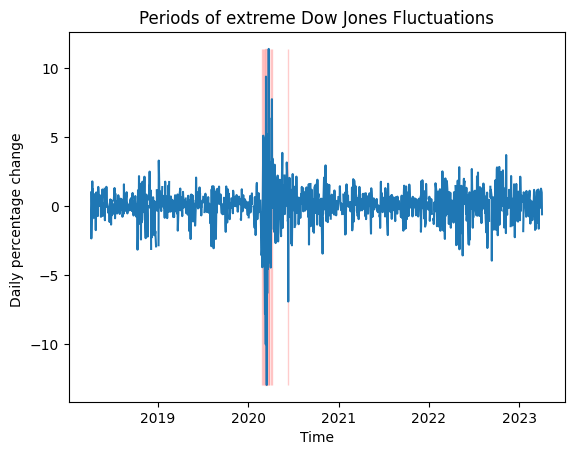

In [11]:
# Write your own code

financial["bool_djia"] = (financial["growth_djia"] > 4) | (financial["growth_djia"] < -4)

# Create a line plot
plt.plot("date", "growth_djia", data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("Periods of extreme Dow Jones Fluctuations")

# Add shaded region
vec_y = financial["growth_djia"]
plt.fill_between(x= financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial["bool_djia"],
                 alpha = 0.2,color = "red")

plt.show()


<font size = "5">


(e) Compute aggregate dataset by time period

Text(0.5, 1.0, 'Monthly average stock market performance')

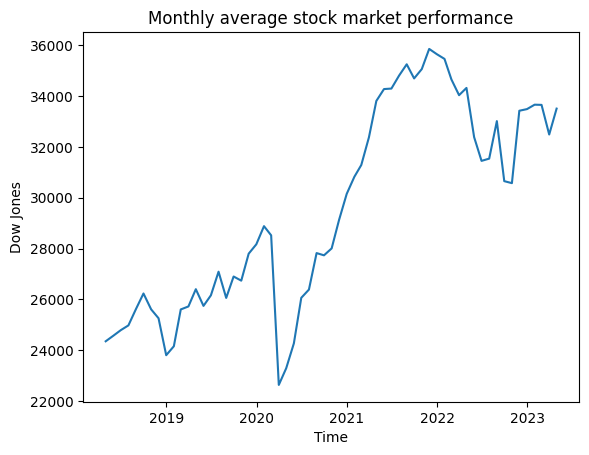

In [18]:
# In "freq" specify the letter for the level of aggregation
# year (y), month (m), week (w), day(d)
month_config = pd.Grouper(key='date', freq='m')
monthlydata = (financial
               .groupby(month_config) 
               .agg(djia_mean = ("djia","mean"))
               .reset_index())

#plot aggregate data
plt.plot("date","djia_mean",
          data = monthlydata.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("Dow Jones")
plt.title("Monthly average stock market performance")



<font size = "5">

(f) Convert a dataset to long format

In [15]:
# Write your own code

financial_long = pd.melt(financial,
                         var_name   = "portfolio_type",
                         value_name = "portfolio_value",
                         id_vars='date', #unique id with dataset
                         value_vars=['sp500','djia']) #cols u want to stack, stacks sp500 & djia and combines
#always end up with index column (date), portfolio type & portfolio value
display(financial_long)

financial_wide = (pd.pivot(financial_long,
                           index = 'date',
                           columns = 'portfolio_type',
                           values =  'portfolio_value'))

display(financial_wide)

,date,portfolio_type,portfolio_value
0,2018-04-04,sp500,2644.69
1,2018-04-05,sp500,2662.84
2,2018-04-06,sp500,2604.47
3,2018-04-09,sp500,2613.16
4,2018-04-10,sp500,2656.87
...,...,...,...
2605,2023-03-29,djia,32717.60
2606,2023-03-30,djia,32859.03
2607,2023-03-31,djia,33274.15
2608,2023-04-03,djia,33601.15


portfolio_type,djia,sp500
date,,
2018-04-04,24264.30,2644.69
2018-04-05,24505.22,2662.84
2018-04-06,23932.76,2604.47
2018-04-09,23979.10,2613.16
2018-04-10,24408.00,2656.87
...,...,...
2023-03-29,32717.60,4027.81
2023-03-30,32859.03,4050.83
2023-03-31,33274.15,4109.31
